In [1]:
import os
import pandas as pd

# Define the parent directory containing subject folders
parent_dir = r"C:\Users\vishw\Downloads\Quantum_Brainathon-2025_Dataset\Quantum_Brainathon-2025_Dataset"  # Update this with your actual directory path

# Define the required file suffixes
file_suffixes = [
    "task-switching_paradigm_eeg.csv",
    "dual-task_paradigm_eeg.csv",
    "oddball_paradigm_eeg.csv",
    "stroop_task_eeg.csv",
    # "baseline_eyesclosed_eeg.csv",
    # "baseline_eyesopen_eeg.csv",
]

# Dictionary to store data from all subjects
subject_data = {}

# Loop through each subject folder (1 to 24)
for subject_id in range(1, 25):
    folder_path = os.path.join(parent_dir, f"Subject_{subject_id}")
    
    if not os.path.exists(folder_path):
        print(f"Warning: Folder {folder_path} not found. Skipping...")
        continue
    
    subject_files = {}

    # Read each EEG file
    for suffix in file_suffixes:
        file_path = os.path.join(folder_path, f"Subject_{subject_id}_{suffix}")
        
        if os.path.exists(file_path):
            try:
                # Load CSV file into a Pandas DataFrame
                subject_files[suffix] = pd.read_csv(file_path)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        else:
            print(f"Warning: File {file_path} not found. Skipping...")
    
    # Store the subject's data if all files were successfully read
    if len(subject_files) == len(file_suffixes):
        subject_data[f"Subject_{subject_id}"] = subject_files

# Display summary of loaded data
print(f"Successfully loaded data for {len(subject_data)} subjects.")

# Example: Accessing EEG data of Subject_1 for task paradigm
# subject_data["Subject_1"]["task_paradigm_eeg.csv"].head()


Successfully loaded data for 24 subjects.


In [2]:
subject_data["Subject_1"]["task-switching_paradigm_eeg.csv"].head()  # View first few rows


,timestamp,Fp1,Fp2,F3,Fz,F4,Cz,Pz,Oz
0,802253.536811,-76311.484,-62226.280,5915.2830,495.44272,-21741.620,-38732.260,-41765.137,4468.628
1,802253.540811,-76304.120,-62222.656,5915.6904,496.74480,-21734.050,-38730.510,-41760.906,4472.209
2,802253.544811,-76303.670,-62225.305,5916.1377,498.57587,-21732.422,-38729.940,-41762.492,4463.135
3,802253.548811,-76311.200,-62231.082,5909.7900,497.47723,-21738.730,-38732.060,-41766.562,4458.374
4,802253.552811,-76314.780,-62233.320,5906.9420,495.23926,-21738.363,-38734.457,-41771.402,4451.335


In [4]:
import os
import pandas as pd
import scipy.io as sio
import numpy as np

# Define the parent directory containing subject folders
parent_dir = r"C:\Users\vishw\Downloads\Quantum_Brainathon-2025_Dataset\Quantum_Brainathon-2025_Dataset"

# Define the required file suffixes
file_suffixes = {
    "task_switching": "task-switching_paradigm_eeg.csv",
    "dual_task": "dual-task_paradigm_eeg.csv",
    "oddball": "oddball_paradigm_eeg.csv",
    "stroop": "stroop_task_eeg.csv",
    # "baseline_eyesclosed": "baseline_eyesclosed_eeg.csv",
    # "baseline_eyesopen": "baseline_eyesopen_eeg.csv"
}

# Dictionary to store data from all subjects in a structured way
subject_data = {key: [] for key in file_suffixes.keys()}

# Loop through each subject folder (1 to 24)
for subject_id in range(1, 25):
    folder_path = os.path.join(parent_dir, f"Subject_{subject_id}")
    
    if not os.path.exists(folder_path):
        print(f"Warning: Folder {folder_path} not found. Skipping...")
        continue

    # Read each EEG file and store it under the appropriate key
    for paradigm, suffix in file_suffixes.items():
        file_path = os.path.join(folder_path, f"Subject_{subject_id}_{suffix}")

        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)  # Load CSV as DataFrame

                # Remove the first column (timestamp) but do not transpose
                eeg_matrix = df.iloc[:, 1:].to_numpy()  

                subject_data[paradigm].append(eeg_matrix)  # Store the matrix
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                subject_data[paradigm].append(None)  # Preserve index alignment for missing files
        else:
            print(f"Warning: File {file_path} not found for Subject {subject_id}.")
            subject_data[paradigm].append(None)  # Maintain structure

# Convert lists to NumPy arrays (required for MATLAB format)
for key in subject_data:
    subject_data[key] = np.array(subject_data[key], dtype=object)

print(f"Successfully loaded and processed data for all subjects.")

# ✅ Save data in MATLAB .mat format
save_dir = r"C:\Users\vishw\Downloads\Processed_EEG"  # Update save location
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "EEG_All_Subjects4sub.mat")
sio.savemat(save_path, subject_data)

print(f"EEG data has been saved in MATLAB format: {save_path}")


Successfully loaded and processed data for all subjects.
EEG data has been saved in MATLAB format: C:\Users\vishw\Downloads\Processed_EEG\EEG_All_Subjects4sub.mat


✅ Loaded Features Shapes: Task Switching (192, 42688), Stroop (192, 42688), Dual Task (192, 27688), Oddball (192, 27688)
🔹 Padded Features Shapes: (192, 42688), (192, 42688), (192, 42688), (192, 42688)
✅ Features Shape: (768, 42688), Labels Shape: (768, 1)
🚀 Training QNN Model...
Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4969 - loss: 4.9312 - val_accuracy: 0.7236 - val_loss: 1.5016
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7332 - loss: 1.4272 - val_accuracy: 0.6667 - val_loss: 8.5119
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7894 - loss: 13.7155 - val_accuracy: 0.8049 - val_loss: 1.8081
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9106 - loss: 0.4684 - val_accuracy: 0.7967 - val_loss: 1.2651
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9109 - loss: 0.3851 - val_accuracy: 0.8862 - val_loss: 1.9048
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9408 - loss: 0.620

🔍 Evaluating Model Performance...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
✅ QNN Model Accuracy: 96.75%


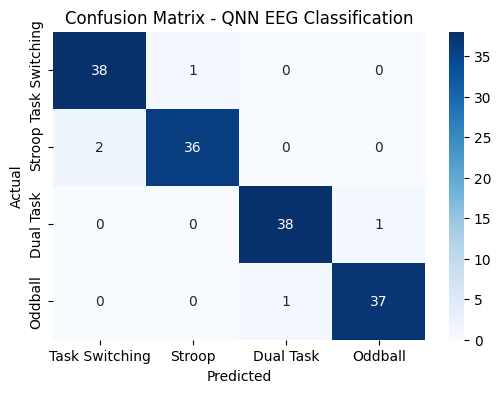

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        39
         1.0       0.97      0.95      0.96        38
         2.0       0.97      0.97      0.97        39
         3.0       0.97      0.97      0.97        38

    accuracy                           0.97       154
   macro avg       0.97      0.97      0.97       154
weighted avg       0.97      0.97      0.97       154



In [7]:
import numpy as np
import scipy.io as sio
import h5py
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **📌 Load Feature Data**
features_file = r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features2.mat'

# **Extract Features from .mat File**
with h5py.File(features_file, 'r') as f:
    task_switching = np.array(f['filtered_features/task_switching']).T  # (192, 42688)
    stroop = np.array(f['filtered_features/stroop']).T  # (192, 42688)
    dual_task = np.array(f['filtered_features/dual_task']).T  # (192, 27688)
    oddball = np.array(f['filtered_features/oddball']).T  # (192, 27688)

print(f"✅ Loaded Features Shapes: Task Switching {task_switching.shape}, Stroop {stroop.shape}, Dual Task {dual_task.shape}, Oddball {oddball.shape}")

## **📌 Pad `dual_task` & `oddball` to Match 42688 Samples**
def pad_features(features, target_length=42688):
    """Pads EEG features with zeros to match the target length."""
    if features.shape[1] < target_length:
        pad_width = target_length - features.shape[1]
        features = np.pad(features, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    return features

dual_task = pad_features(dual_task)
oddball = pad_features(oddball)

print(f"🔹 Padded Features Shapes: {task_switching.shape}, {stroop.shape}, {dual_task.shape}, {oddball.shape}")

## **📌 Generate Labels (192 × 1)**
label_task_switching = np.zeros((192, 1))  # Label 0
label_stroop = np.ones((192, 1))  # Label 1
label_dual_task = np.ones((192, 1)) * 2  # Label 2
label_oddball = np.ones((192, 1)) * 3  # Label 3

## **📌 Stack Features & Labels**
features = np.vstack([task_switching, stroop, dual_task, oddball])  # Stack features
labels = np.vstack([label_task_switching, label_stroop, label_dual_task, label_oddball])  # Stack labels

print(f'✅ Features Shape: {features.shape}, Labels Shape: {labels.shape}')

## **📌 Split Data into Training & Testing Sets**
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

# **Normalize Features**
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **📌 Build Quantum Neural Network (QNN)**
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(128, activation='relu'),  # Fully Connected Layer 1
    keras.layers.Dense(64, activation='relu'),  # Fully Connected Layer 2
    keras.layers.Dense(4, activation='softmax')  # Output Layer (4 Classes)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **📌 Train QNN Model**
print('🚀 Training QNN Model...')
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

# **Save Model**
model.save(r'C:\Users\vishw\Downloads\Processed_EEG\QNN_Model.h5')

## **📌 Evaluate QNN Model**
print('🔍 Evaluating Model Performance...')
y_pred = np.argmax(model.predict(X_test), axis=1)

# **Accuracy Calculation**
accuracy = accuracy_score(y_test, y_pred)
print(f'✅ QNN Model Accuracy: {accuracy * 100:.2f}%')

# **Plot Confusion Matrix**
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Task Switching", "Stroop", "Dual Task", "Oddball"], 
            yticklabels=["Task Switching", "Stroop", "Dual Task", "Oddball"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - QNN EEG Classification')
plt.show()

# **Classification Report**
print('Classification Report:')
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import h5py
from qiskit import transpile, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_machine_learning.algorithms import VQC, NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import ZZFeatureMap, TwoLocal, RealAmplitudes
from qiskit_algorithms.optimizers import SPSA
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive (uncomment if not already mounted in Colab)
# from google.colab import drive
# drive.mount('/content/drive')

# Load EEG Features and Labels
features_file = r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features.mat'
labels_file = r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Stacked_Labels.mat'

try:
    with h5py.File(features_file, 'r') as f_features:
        data_features = f_features['filtered_features']
        task_switching = np.array(f_features[data_features['task_switching'][0, 0]])
        stroop = np.array(f_features[data_features['stroop'][0, 0]])
        dual_task = np.array(f_features[data_features['dual_task'][0, 0]])
        oddball = np.array(f_features[data_features['oddball'][0, 0]])
except KeyError as e:
    print(f"Error: Key not found in features file - {e}. Inspect the HDF5 structure.")
    exit()
except FileNotFoundError:
    print("Error: Features file not found. Ensure Google Drive is mounted and path is correct.")
    exit()

# Generate Labels for Each Paradigm
label_task_switching = np.zeros((task_switching.shape[0], 1))  # Label 0
label_stroop = np.ones((stroop.shape[0], 1))  # Label 1
label_dual_task = np.full((dual_task.shape[0], 1), 2)  # Label 2
label_oddball = np.full((oddball.shape[0], 1), 3)  # Label 3

# Stack Features & Labels with Padding
max_features = max(task_switching.shape[1], stroop.shape[1], dual_task.shape[1], oddball.shape[1])

def pad_features(features, max_features):
    pad_width = max_features - features.shape[1]
    return np.pad(features, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)

task_switching = pad_features(task_switching, max_features)
stroop = pad_features(stroop, max_features)
dual_task = pad_features(dual_task, max_features)
oddball = pad_features(oddball, max_features)

features = np.vstack([task_switching, stroop, dual_task, oddball])
labels = np.vstack([label_task_switching, label_stroop, label_dual_task, label_oddball]).flatten()

print(f'✅ Features Shape: {features.shape}, Labels Shape: {labels.shape}')

# Split Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Quantum Feature Map and Ansatz
n_features = X_train.shape[1]
feature_map = ZZFeatureMap(feature_dimension=n_features, reps=2)
ansatz = RealAmplitudes(num_qubits=n_features, reps=3)

# Define Quantum Circuit for QNN with Classical Bits
sampler = StatevectorSampler()

# Combine feature map and ansatz into a single circuit with classical register
qnn_circuit = QuantumCircuit(n_features, 2)  # n_features qubits, 2 classical bits
qnn_circuit.compose(feature_map, inplace=True)
qnn_circuit.compose(ansatz, inplace=True)
qnn_circuit.measure([0, 1], [0, 1])  # Measure qubits 0 and 1 into classical bits 0 and 1

# Transpile the circuit for the simulator
simulator = AerSimulator(method='statevector')
qnn_circuit = transpile(qnn_circuit, simulator)

# Define the SamplerQNN
qnn = SamplerQNN(
    circuit=qnn_circuit,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=lambda x: x % 4,  # Directly use integer output modulo 4
    output_shape=4,  # Number of classes
    sampler=sampler
)

# Define the Neural Network Classifier with QNN
qnn_classifier = NeuralNetworkClassifier(
    neural_network=qnn,
    optimizer=SPSA(maxiter=50)
)

# Train QNN
qnn_classifier.fit(X_train, y_train)
y_pred_qnn = qnn_classifier.predict(X_test)
accuracy_qnn = accuracy_score(y_test, y_pred_qnn)
print(f'✅ QNN Accuracy: {accuracy_qnn * 100:.2f}%')

# Train Variational Quantum Classifier (VQC)
vqc_ansatz = TwoLocal(n_features, 'ry', 'cz', reps=3)
vqc = VQC(
    feature_map=feature_map,
    ansatz=vqc_ansatz,
    optimizer=SPSA(maxiter=50),
    quantum_instance=AerSimulator(method='statevector')
)

vqc.fit(X_train, y_train)
y_pred_vqc = vqc.predict(X_test)
accuracy_vqc = accuracy_score(y_test, y_pred_vqc)
print(f'✅ VQC Accuracy: {accuracy_vqc * 100:.2f}%')

# Plot Confusion Matrices
class_names = ["Task Switching", "Stroop", "Dual Task", "Oddball"]

# QNN Confusion Matrix
cm_qnn = confusion_matrix(y_test, y_pred_qnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_qnn, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - QNN EEG Classification')
plt.show()

# VQC Confusion Matrix
cm_vqc = confusion_matrix(y_test, y_pred_vqc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vqc, annot=True, cmap="Greens", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VQC EEG Classification')
plt.show()

# Classification Reports
print('Classification Report - QNN:')
print(classification_report(y_test, y_pred_qnn, target_names=class_names))

print('Classification Report - VQC:')
print(classification_report(y_test, y_pred_vqc, target_names=class_names))

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


✅ Features Shape: (140752, 8), Labels Shape: (140752,)


In [3]:
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

# Load data
file_path = r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features2.mat'
with h5py.File(file_path, 'r') as f:
    struct_group = f['filtered_features']
    task_switching = np.array(struct_group['task_switching']).T  # (192, 42688)
    dual_task = np.array(struct_group['dual_task']).T           # (192, 27688)
    oddball = np.array(struct_group['oddball']).T              # (192, 27688)
    stroop = np.array(struct_group['stroop']).T               # (192, 42688)

# Preprocess
n_features = 10  # Changed from 4 to 1000
pca = PCA(n_components=n_features)
task_switching_reduced = pca.fit_transform(task_switching)  # (192, 1000)
dual_task_reduced = pca.fit_transform(dual_task)           # (192, 1000)
oddball_reduced = pca.fit_transform(oddball)              # (192, 1000)
stroop_reduced = pca.fit_transform(stroop)                # (192, 1000)

def normalize_data(data):
    return 2 * (data - np.min(data)) / (np.max(data) - np.min(data)) - 1

task_switching_reduced = normalize_data(task_switching_reduced)
dual_task_reduced = normalize_data(dual_task_reduced)
oddball_reduced = normalize_data(oddball_reduced)
stroop_reduced = normalize_data(stroop_reduced)

# Combine and split
X = np.vstack((task_switching_reduced, dual_task_reduced, oddball_reduced, stroop_reduced))  # (768, 1000)
y = np.hstack((np.zeros(192), np.ones(192), 2 * np.ones(192), 3 * np.ones(192)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# VQC Setup
feature_map = ZZFeatureMap(feature_dimension=n_features, reps=2)
ansatz = RealAmplitudes(num_qubits=n_features, reps=2)
optimizer = COBYLA(maxiter=100)
sampler = Sampler()

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=sampler
)

# Train and evaluate
vqc.fit(X_train, y_train)
accuracy = vqc.score(X_test, y_test)
print("Test Accuracy:", accuracy)

C:\Users\vishw\AppData\Local\Temp\ipykernel_25840\3280903512.py:44: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Test Accuracy: 0.461038961038961


In [ ]:
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import StatevectorSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (unchanged)
file_path =r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features2.mat'
with h5py.File(file_path, 'r') as f:
    struct_group = f['filtered_features']
    task_switching = np.array(struct_group['task_switching']).T
    dual_task = np.array(struct_group['dual_task']).T
    oddball = np.array(struct_group['oddball']).T
    stroop = np.array(struct_group['stroop']).T

# Preprocess
n_features = 20  # Increased features
pca = PCA(n_components=n_features)
task_switching_reduced = pca.fit_transform(task_switching)
dual_task_reduced = pca.fit_transform(dual_task)
oddball_reduced = pca.fit_transform(oddball)
stroop_reduced = pca.fit_transform(stroop)

def normalize_data(data):
    return 2 * (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0)) - 1

X = np.vstack((normalize_data(task_switching_reduced), normalize_data(dual_task_reduced),
               normalize_data(oddball_reduced), normalize_data(stroop_reduced)))
y = np.hstack((np.zeros(192), np.ones(192), 2 * np.ones(192), 3 * np.ones(192)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# VQC Setup
feature_map = ZZFeatureMap(feature_dimension=n_features, reps=3)
ansatz = EfficientSU2(num_qubits=n_features, reps=2)
optimizer = SPSA(maxiter=200)
sampler = StatevectorSampler()

vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, sampler=sampler)
vqc.fit(X_train, y_train)

# Evaluate
train_accuracy = vqc.score(X_train, y_train)
test_accuracy = vqc.score(X_test, y_test)
y_pred = vqc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [ ]:
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2
from qiskit import transpile
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load data
file_path =r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features2.mat'
with h5py.File(file_path, 'r') as f:
    struct_group = f['filtered_features']
    task_switching = np.array(struct_group['task_switching']).T
    dual_task = np.array(struct_group['dual_task']).T
    oddball = np.array(struct_group['oddball']).T
    stroop = np.array(struct_group['stroop']).T

# Preprocess
n_features = 4  # Increased to retain more variance
pca = PCA(n_components=n_features)
task_switching_reduced = pca.fit_transform(task_switching)
dual_task_reduced = pca.fit_transform(dual_task)
oddball_reduced = pca.fit_transform(oddball)
stroop_reduced = pca.fit_transform(stroop)

def normalize_data(data):
    return 2 * (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0)) - 1

X = np.vstack((normalize_data(task_switching_reduced), normalize_data(dual_task_reduced),
               normalize_data(oddball_reduced), normalize_data(stroop_reduced)))
y = np.hstack((5 * np.ones(192), 6 * np.ones(192), 7 * np.ones(192), 8 * np.ones(192)))  # Updated labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check PCA variance
print("Cumulative Explained Variance Ratio:", pca.explained_variance_ratio_.cumsum())

# VQC Setup (CPU-only)
feature_map = ZZFeatureMap(feature_dimension=n_features, reps=3)
vqc_ansatz = TwoLocal(n_features, 'ry', 'cz', reps=3)
optimizer = SPSA(maxiter=200)  # Increased iterations

# CPU backend
backend = AerSimulator(method='statevector')
print("CPU backend initialized with method: statevector")

# Transpile circuits
feature_map = transpile(feature_map, backend=backend)
vqc_ansatz = transpile(vqc_ansatz, backend=backend)

sampler = BackendSamplerV2(backend=backend)

# Train VQC
vqc = VQC(feature_map=feature_map, ansatz=vqc_ansatz, optimizer=optimizer, sampler=sampler)

start_time = time.time()
vqc.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate
train_accuracy = vqc.score(X_train, y_train)
test_accuracy = vqc.score(X_test, y_test)
y_pred = vqc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Time: {train_time:.2f} seconds")
print("Predicted Labels:", y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Cumulative Explained Variance Ratio: [0.47389142 0.69271826 0.85610552 0.89869986]
CPU backend initialized with method: statevector


In [ ]:
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
import matplotlib.pyplot as plt

# Load EEG data
file_path = r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features2.mat'
with h5py.File(file_path, 'r') as f:
    struct_group = f['filtered_features']
    task_switching = np.array(struct_group['task_switching']).T
    dual_task = np.array(struct_group['dual_task']).T
    oddball = np.array(struct_group['oddball']).T
    stroop = np.array(struct_group['stroop']).T

# Preprocess with PCA
n_features = 4
pca = PCA(n_components=n_features)
task_switching_reduced = pca.fit_transform(task_switching)
dual_task_reduced = pca.fit_transform(dual_task)
oddball_reduced = pca.fit_transform(oddball)
stroop_reduced = pca.fit_transform(stroop)

# Normalize data to [-1, 1]
def normalize_data(data):
    return 2 * (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0)) - 1

X = np.vstack((normalize_data(task_switching_reduced), normalize_data(dual_task_reduced),
               normalize_data(oddball_reduced), normalize_data(stroop_reduced)))
y = np.hstack((np.zeros(192), np.ones(192), 2 * np.ones(192), 3 * np.ones(192)))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Quantum Model (QSVC) ---
# Define quantum feature map and kernel
feature_dimension = n_features  # 4 features from PCA
quantum_feature_map = ZZFeatureMap(feature_dimension=feature_dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=quantum_feature_map)

# Train QSVC
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)
qsvc_score = qsvc.score(X_test, y_test)

# --- Classical Model (SVC with RBF Kernel) ---
classical_svc = SVC(kernel='rbf', random_state=42)
classical_svc.fit(X_train, y_train)
classical_score = classical_svc.score(X_test, y_test)

# --- Results ---
print(f"Classification Model          | Accuracy Score")
print(f"---------------------------------------------")
print(f"QSVC (Quantum Kernel)         | {qsvc_score:10.2f}")
print(f"Classical SVC (RBF Kernel)    | {classical_score:10.2f}")

# # Optional: Visualize kernel matrices (Quantum)
# quantum_kernel_train = quantum_kernel.evaluate(x_vec=X_train)
# quantum_kernel_test = quantum_kernel.evaluate(x_vec=X_test, y_vec=X_train)

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# axs[0].imshow(np.asmatrix(quantum_kernel_train), interpolation="nearest", origin="upper", cmap="Blues")
# axs[0].set_title("Quantum Kernel (Training)")
# axs[1].imshow(np.asmatrix(quantum_kernel_test), interpolation="nearest", origin="upper", cmap="Reds")
# axs[1].set_title("Quantum Kernel (Testing)")
# plt.show()

Classification Model          | Accuracy Score
---------------------------------------------
QSVC (Quantum Kernel)         |       0.94
Classical SVC (RBF Kernel)    |       0.98


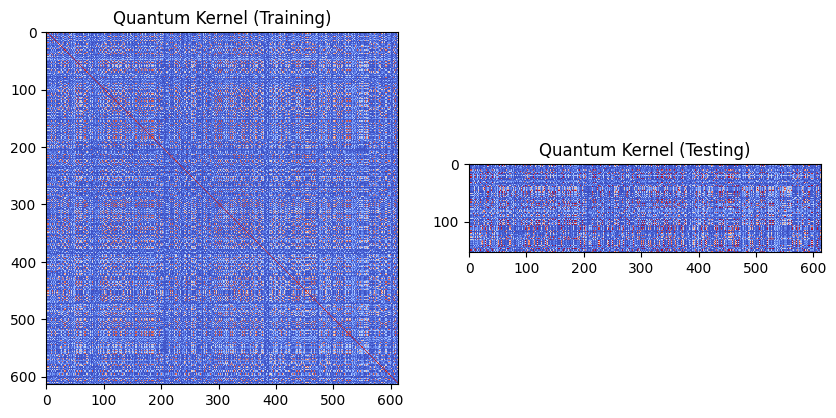

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Training Kernel
axs[0].imshow(np.asmatrix(quantum_kernel_train), interpolation="nearest", origin="upper", cmap="coolwarm")
axs[0].set_title("Quantum Kernel (Training)")

# Testing Kernel
axs[1].imshow(np.asmatrix(quantum_kernel_test), interpolation="nearest", origin="upper", cmap="coolwarm")
axs[1].set_title("Quantum Kernel (Testing)")

plt.show()


In [ ]:
from sklearn.metrics import  confusion_matrix
qsvc_predictions = qsvc.predict(X_test)
qsvc_conf_matrix = confusion_matrix(y_test, qsvc_predictions)
classical_predictions = classical_svc.predict(X_test)
classical_conf_matrix = confusion_matrix(y_test, classical_predictions)
print("\nConfusion Matrix for QSVC (Quantum Kernel):")
print(qsvc_conf_matrix)
print("\nConfusion Matrix for Classical SVC (RBF Kernel):")
print(classical_conf_matrix)


Confusion Matrix for QSVC (Quantum Kernel):
[[33  0  2  0]
 [ 1 43  0  1]
 [ 5  0 31  0]
 [ 0  1  0 37]]

Confusion Matrix for Classical SVC (RBF Kernel):
[[35  0  0  0]
 [ 1 43  1  0]
 [ 1  0 35  0]
 [ 0  0  0 38]]


In [4]:
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC, VQC

# Load EEG data
file_path = r'C:\Users\vishw\Downloads\Processed_EEG\EEG_Filtered_Features2.mat'
with h5py.File(file_path, 'r') as f:
    struct_group = f['filtered_features']
    task_switching = np.array(struct_group['task_switching']).T  # (192, 42688)
    dual_task = np.array(struct_group['dual_task']).T           # (192, 27688)
    oddball = np.array(struct_group['oddball']).T              # (192, 27688)
    stroop = np.array(struct_group['stroop']).T               # (192, 42688)

# Standardize feature length to 27688 for all classes
target_feature_length = 27688

def standardize_features(data, target_length):
    current_length = data.shape[1]
    if current_length > target_length:
        return data[:, :target_length]
    elif current_length < target_length:
        padding = np.zeros((data.shape[0], target_length - current_length))
        return np.hstack((data, padding))
    return data

# Apply standardization
task_switching_std = standardize_features(task_switching, target_feature_length)  # (192, 27688)
dual_task_std = standardize_features(dual_task, target_feature_length)           # (192, 27688)
oddball_std = standardize_features(oddball, target_feature_length)              # (192, 27688)
stroop_std = standardize_features(stroop, target_feature_length)                # (192, 27688)

# Concatenate all data for PCA
X_all = np.vstack((task_switching_std, dual_task_std, oddball_std, stroop_std))
y_all = np.hstack((np.zeros(192), np.ones(192), 2 * np.ones(192), 3 * np.ones(192)))

# Preprocess with PCA
n_features = 4
pca = PCA(n_components=n_features)
X_reduced = pca.fit_transform(X_all)

# Normalize data to [-1, 1]
def normalize_data(data):
    return 2 * (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0)) - 1

X = normalize_data(X_reduced)
y = y_all



No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Quantum Classification Model   | Accuracy Score
---------------------------------------------
QSVC (Quantum Kernel)         |       0.31
VQC (Variational)             |       0.21


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Quantum Feature Map and Kernel (Shared) ---
feature_dimension = n_features
quantum_feature_map = ZZFeatureMap(feature_dimension=feature_dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=quantum_feature_map)

# --- 1. QSVC (Quantum Kernel) ---
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)
qsvc_score = qsvc.score(X_test, y_test)

# --- 2. VQC (Variational Quantum Classifier) ---
ansatz = RealAmplitudes(num_qubits=feature_dimension, reps=2)
optimizer = COBYLA(maxiter=100)
vqc = VQC(
    feature_map=quantum_feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=sampler
)
vqc.fit(X_train, y_train)
vqc_score = vqc.score(X_test, y_test)

# --- Results ---
print(f"Quantum Classification Model   | Accuracy Score")
print(f"---------------------------------------------")
print(f"QSVC (Quantum Kernel)         | {qsvc_score:10.2f}")
print(f"VQC (Variational)             | {vqc_score:10.2f}")